In [22]:
import pandas as pd
import missingno as mnso
import sqlite3
from sqlalchemy import create_engine

In [7]:
df450 = pd.read_csv('saude.csv', delimiter=";")# dados base real com 450k

<ipython-input-7-253fa35330a2>:1: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  df450 = pd.read_csv('saude.csv', delimiter=";")


In [8]:
df450.head()

,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,TP_ESTAB_SEMPRE_ABERTO,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO
0,MG0000312490000000000000161748,2195291,"1,79477E+13",3,3,PREFEITURA MUNICIPAL DE EUGENOPOLIS,PSF JOAO DA CRUZ REIS,RUA MAESTRO ABIGAIL DE MOURA,S/N,NaN,...,NaN,NaN,NaN,NaN,NaN,M,07/10/2002,NaN,NaN,NaN
1,RO00000000000000099990010000188,2497492,"5,89363E+12",3,3,PREFEITURA MUNICIPAL DE GUAJARA MIRIM,HEMONUCLEO DE GUAJARA MIRIM GUAJARA MIRIM,AV MARECHAL DEODORO,S/N,NaN,...,NaN,NaN,NaN,NaN,NaN,M,30/01/2002,NaN,NaN,NaN
2,RO00000000000000099990010000196,2497573,"4,63221E+12",3,3,PREFEITURA MUNICIPAL DE PRESIDENTE MEDICI,POSTO DE SAUDE CRISTO REI PRESIDENTE MEDICI,LINHA 132,S/N,NaN,...,NaN,NaN,NaN,NaN,NaN,M,30/01/2002,NaN,NaN,NaN
3,RO00000000000000099990010000198,2497603,"4,63221E+12",3,3,PREFEITURA MUNICIPAL DE PRESIDENTE MEDICI,POSTO DE SAUDE SANTA SOFIA PRESIDENTE MEDICI,LINHA 110,S/N,NaN,...,NaN,NaN,NaN,NaN,NaN,M,30/01/2002,NaN,NaN,NaN
4,"2,3113E+12",2565374,"2,34447E+13",3,3,PREFEITURA MUNICIPAL DE QUIXADA,POSTO DE SAUDE FRANCISCO ENEAS DE LIMA,RUA EMIPIDIO CORREIA LIMA,1163,ZONA RURAL,...,NaN,NaN,NaN,NaN,NaN,M,08/05/2002,NaN,NaN,NaN


In [9]:
df450.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452740 entries, 0 to 452739
Data columns (total 54 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   CO_UNIDADE                                   452740 non-null  object 
 1   CO_CNES                                      452740 non-null  int64  
 2   NU_CNPJ_MANTENEDORA                          105707 non-null  object 
 3   TP_PFPJ                                      452740 non-null  int64  
 4   NIVEL_DEP                                    452740 non-null  int64  
 5   NO_RAZAO_SOCIAL                              452737 non-null  object 
 6   NO_FANTASIA                                  452698 non-null  object 
 7   NO_LOGRADOURO                                452740 non-null  object 
 8   NU_ENDERECO                                  452447 non-null  object 
 9   NO_COMPLEMENTO                               205759 non-nul

<AxesSubplot:>

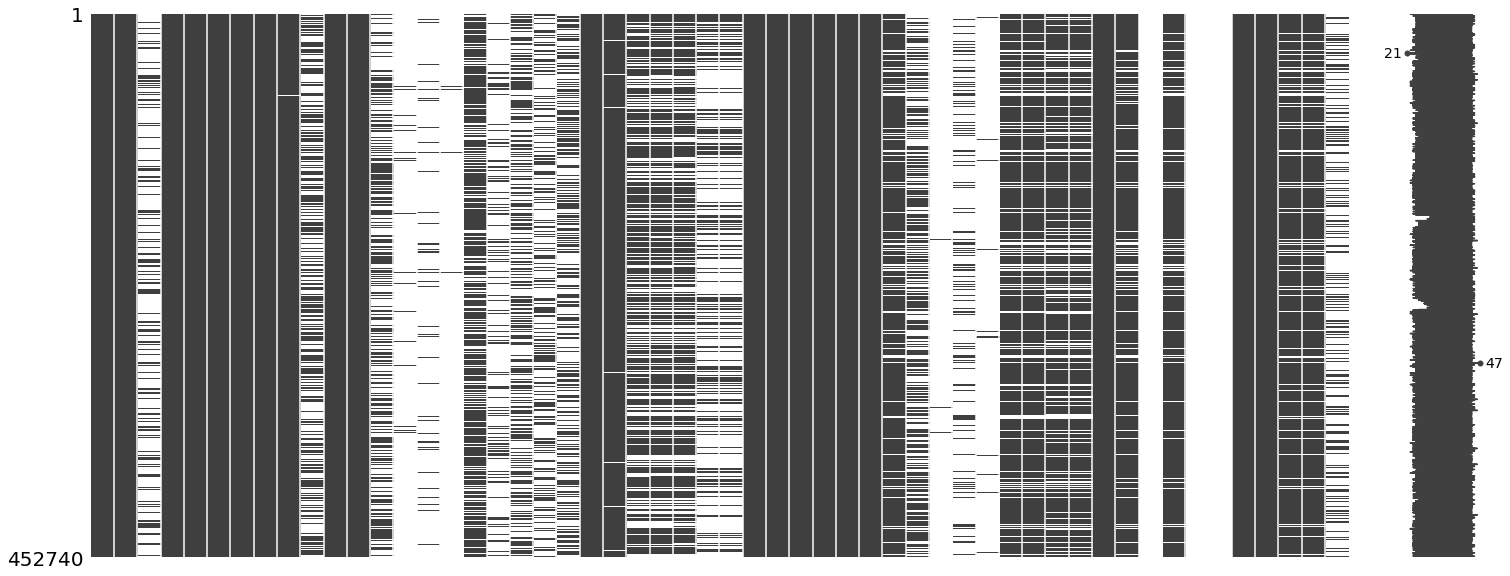

In [23]:
mnso.matrix(df450)

In [12]:
#baixando base que foi ingerida via API
disk_engine = create_engine(r'sqlite:///C:\Users\Renato\OneDrive\Pessoal\RSL Consultoria\Horizon\05-Tese Psiquiatria\HZN-tese-psiquiatria\psiquiatria.db')
query = pd.read_sql_query("SELECT * FROM data",disk_engine) #393 registros
query.info()
# df393 = 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393062 entries, 0 to 393061
Data columns (total 77 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   id                                           393062 non-null  int64  
 1   cnes                                         393062 non-null  int64  
 2   Nome Fantasia                                393043 non-null  object 
 3   Razão Social                                 393059 non-null  object 
 4   Natureza Jurídica                            393058 non-null  float64
 5   Natureza Jurídica Mantenedora                95526 non-null   object 
 6   CNPJ                                         164043 non-null  float64
 7   Tipo de Pessoa                               393062 non-null  int64  
 8   Nível de dependência                         393062 non-null  int64  
 9   Número do Alvará                             272820 non-nul

In [16]:
list393_cnes = query['cnes'].to_list()
len(list393_cnes)


393062

In [21]:
df59 = df450[~df450['CO_CNES'].isin(list393_cnes)]
df59

,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,TP_ESTAB_SEMPRE_ABERTO,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO
0,MG0000312490000000000000161748,2195291,"1,79477E+13",3,3,PREFEITURA MUNICIPAL DE EUGENOPOLIS,PSF JOAO DA CRUZ REIS,RUA MAESTRO ABIGAIL DE MOURA,S/N,NaN,...,NaN,NaN,NaN,NaN,NaN,M,07/10/2002,NaN,NaN,NaN
1,RO00000000000000099990010000188,2497492,"5,89363E+12",3,3,PREFEITURA MUNICIPAL DE GUAJARA MIRIM,HEMONUCLEO DE GUAJARA MIRIM GUAJARA MIRIM,AV MARECHAL DEODORO,S/N,NaN,...,NaN,NaN,NaN,NaN,NaN,M,30/01/2002,NaN,NaN,NaN
2,RO00000000000000099990010000196,2497573,"4,63221E+12",3,3,PREFEITURA MUNICIPAL DE PRESIDENTE MEDICI,POSTO DE SAUDE CRISTO REI PRESIDENTE MEDICI,LINHA 132,S/N,NaN,...,NaN,NaN,NaN,NaN,NaN,M,30/01/2002,NaN,NaN,NaN
3,RO00000000000000099990010000198,2497603,"4,63221E+12",3,3,PREFEITURA MUNICIPAL DE PRESIDENTE MEDICI,POSTO DE SAUDE SANTA SOFIA PRESIDENTE MEDICI,LINHA 110,S/N,NaN,...,NaN,NaN,NaN,NaN,NaN,M,30/01/2002,NaN,NaN,NaN
5,CE00000000000000099990020000006,2499312,"7,65528E+12",3,3,ASSOCIACAO DE PROT A MAT E A INFANCIA DE MILAGRES,HOSPITAL E MATERNIDADE NOSSA SENHORA DOS MILAGRES,RUA PRAC DO CENTENARIO,S/N,NaN,...,NaN,NaN,NaN,NaN,NaN,S,06/02/2002,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450467,"3,10621E+12",6741924,NaN,1,1,MARCUS DA SILVEIRA CASSINI,MARCUS DA SILVEIRA CASSINI,RUA DOS TIMBIRAS,1560,701,...,N,NaN,S,NaN,NaN,M,16/04/2011,16.0,1.0,NaN
451093,"3,55011E+12",6693016,NaN,3,1,USINA ACUCAREIRA SAO MANUEL,AMBULATORIO MEDICO USINA SAO MANUEL,FAZENDA BOA VISTA,S/N,CX POSTAL 127,...,S,NaN,S,NaN,NaN,M,10/02/2011,16.0,12.0,NaN
451361,"4,11991E+12",6412815,NaN,3,1,CHAMP DOR CLINICA MEDICA LTDA,CLINICA DA COLUNA,BALDUINO TAQUES,1800,NaN,...,N,NaN,S,NaN,NaN,M,17/12/2009,15.0,4.0,N
451745,"5,3001E+12",10952,"3,947E+11",3,3,UNIDADE BASICA DE SAUDE N 06 DE TAGUATINGA,UBS 06 TAGUATINGA,SETOR C SUL AE 01 TAGUATINGA SUL,1,CENTRO DE TAGUATINGA,...,N,NaN,S,NaN,NaN,E,19/11/2002,1.0,12.0,NaN


<AxesSubplot:>

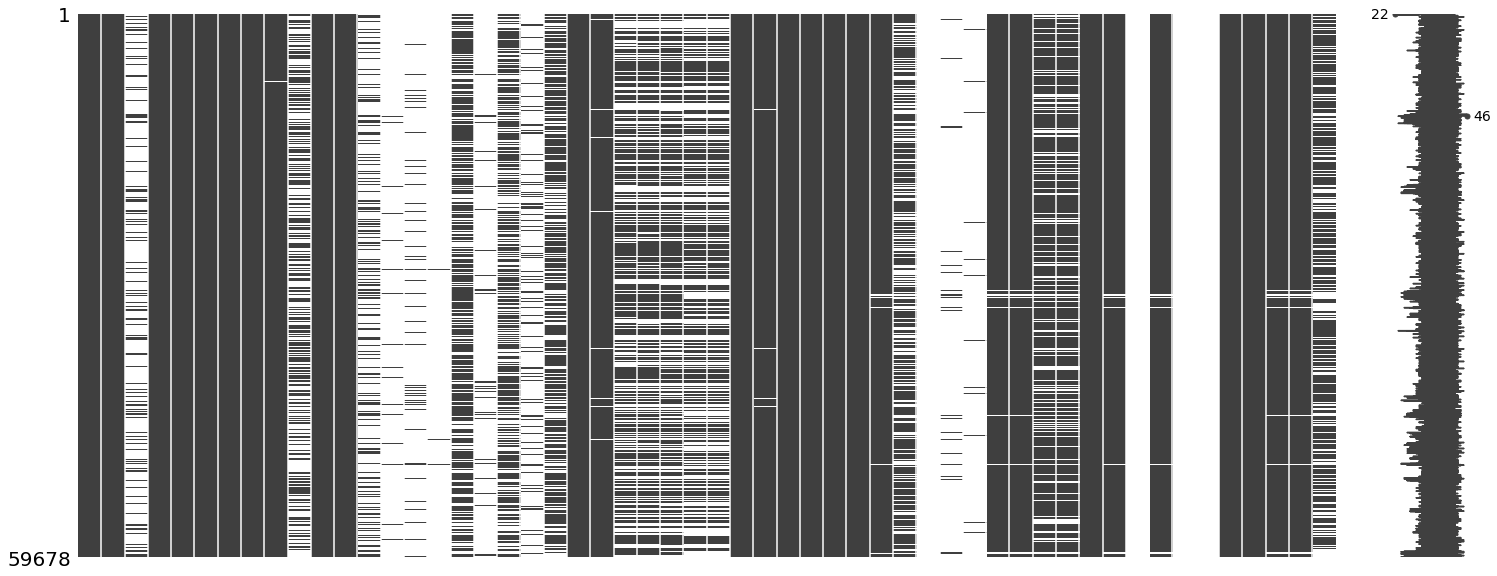

In [24]:
mnso.matrix(df59)


In [25]:
df59.to_excel('estab_nao_encontrados_API.xlsx')